In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
def weight_func(r,r_c):

    if r <= r_c:
        return 1 - r/r_c
    
    else:
        return 0

def int_weight(r,r_c):

    if r <= r_c:
        return -(r - r**2/(2*r_c)) + 0.5 
    
    else:
        return 0
    
def lj_potential(r, eps=0.5, sig=0.5):

    if r < 0.3: 
        return 1e10  
    
    return 4 * eps * ((sig/r)**12 - (sig/r)**6)

def lj_force(r, eps=0.5, sig=0.5):

    if r < 0.3:
        return 1e10  
    
    return 24 * eps / r * (2 * (sig/r)**12 - (sig/r)**6)

lj_potential = np.vectorize(lj_potential)
lj_force = np.vectorize(lj_force)
    
    
weight_func, int_weight = np.vectorize(weight_func), np.vectorize(int_weight)

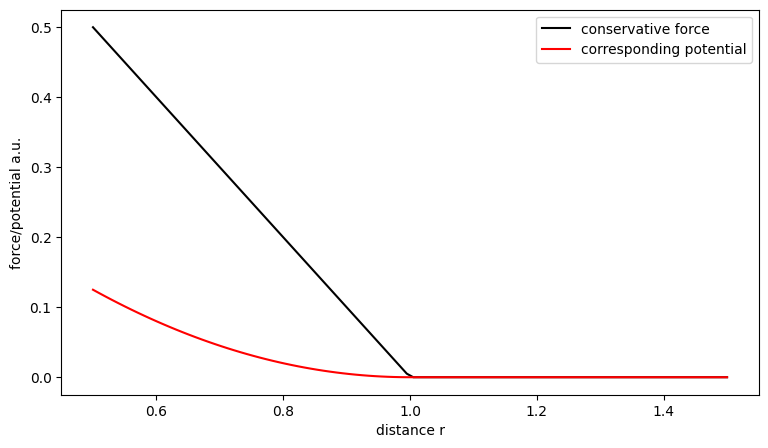

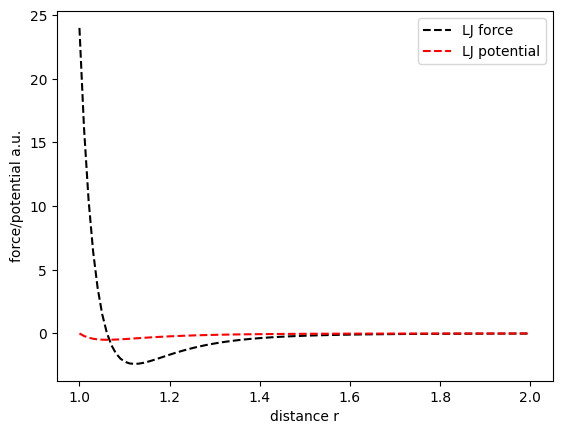

In [56]:
dists = np.linspace(0.5,1.5, num=100)
plt.figure(figsize=(9,5))

plt.plot(dists, weight_func(dists,1), color="black", label="conservative force")
plt.plot(dists, int_weight(dists,1), color="red", label="corresponding potential")

plt.xlabel("distance r")
plt.ylabel("force/potential a.u.")

plt.legend()
plt.show()

plt.plot(dists+0.5, lj_force(dists), color="black", linestyle="--", label="LJ force")
plt.plot(dists+0.5, lj_potential(dists), color="red", linestyle="--", label="LJ potential")

plt.xlabel("distance r")
plt.ylabel("force/potential a.u.")

plt.legend()
plt.show()

